<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_2_1_2_single_neuron_training_pytorch_with_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import sklearn.datasets as skds
import matplotlib.pyplot as plt

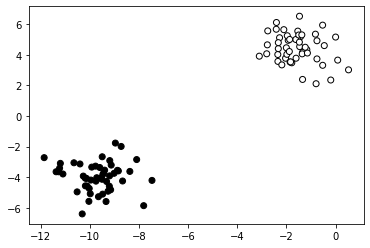

In [ ]:
X, Y = skds.make_blobs(n_samples=100, n_features=2,
                       centers=2, random_state=1)
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()
plt.scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black");

In [ ]:
from torch import nn
z = nn.Linear(2,1)
y = nn.Sigmoid()
print(z)

Linear(in_features=2, out_features=1, bias=True)


In [ ]:
y(z(X[0,:]))

tensor([0.3944], grad_fn=<SigmoidBackward0>)

In [ ]:
print(z.weight, z.bias, sep='\n')
assert(z.weight[0,0]*X[0,0] + z.weight[0,1]*X[0,1] + z.bias[0] == z(X[0,:]))

Parameter containing:
tensor([[0.3820, 0.0817]], requires_grad=True)
Parameter containing:
tensor([-0.2977], requires_grad=True)


In [ ]:
def draw_05_line(w0, w1, b):
  line = lambda x:-w0.detach()/w1.detach() * x - b.detach()/w1.detach()
  x0   = torch.tensor([-11, 0])
  x1   = line(x0)

  plt.plot(x0, x1);
  plt.scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black");

Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)
Parameter containing:
tensor([5.5000], requires_grad=True)


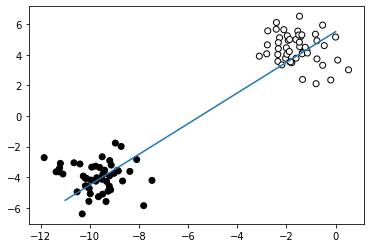

In [ ]:
with torch.no_grad():
  z.weight[0,0], z.weight[0,1], z.bias[0] = (1, -1, 5.5)
print(z.weight, z.bias, sep='\n')
draw_05_line(z.weight[0,0], z.weight[0,1], z.bias[0])

In [ ]:
y_model = torch.squeeze(y(z(X)))
CE_loss = -1/len(Y) * torch.sum(Y*torch.log(y_model) + (1-Y)*torch.log(1-y_model))
print(CE_loss)

tensor(0.8288, grad_fn=<MulBackward0>)


In [ ]:
CE_loss.backward()
print(z.weight.grad, z.bias.grad, sep='\n')

tensor([[2.4333, 1.7574]])
tensor([-0.0710])


In [ ]:
alpha = torch.tensor(0.1)

In [ ]:
z.zero_grad()
y_model = torch.squeeze(y(z(X)))
CE_loss = -1/len(Y) * torch.sum(Y*torch.log(y_model) + (1-Y)*torch.log(1-y_model))
CE_loss.backward()
with torch.no_grad():
  z.weight -= alpha*z.weight.grad
  z.bias   -= alpha*z.bias.grad 

In [ ]:
#torch.autograd.set_detect_anomaly(True)
with torch.no_grad():
  z.weight[0,0], z.weight[0,1], z.bias[0] = (1, -1, 5.5)

alpha    = torch.tensor(0.1)
err      = 1
iter_num = 0

for _ in range(10): #change to 325 and see what happens
  z.zero_grad()
  y_model = torch.squeeze(y(z(X)))
  CE_loss = -1/len(Y)*torch.sum(Y*torch.log(y_model)+(1-Y)*torch.log(1-y_model))
  CE_loss.backward()
  
  with torch.no_grad():
    z.weight -= alpha*z.weight.grad
    z.bias   -= alpha*z.bias.grad 

In [ ]:
#%debug

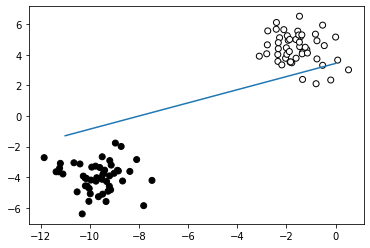

In [ ]:
draw_05_line(z.weight[0,0], z.weight[0,1], z.bias[0])